#### Importing necessary libraries

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve

#### 1.Choose a binary classification dataset.

In [173]:
df=pd.read_csv("D:/AI ML Intern Elevate Labs Benglore/Task 4 Logistic Regression/Breast Cancer Wisconsin.csv")

In [175]:
df = df.drop(df.columns[32], axis=1)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [179]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [181]:
df.shape

(569, 32)

In [183]:
df.duplicated().sum()

0

In [185]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("___"*10)

diagnosis
B    357
M    212
Name: count, dtype: int64
______________________________


So the dataset is pretty much good no need to preprocess this dataset

#### 2.Train/test split and standardize features.

In [188]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])


In [190]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [192]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [194]:
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### 3.Fit a Logistic Regression model.


In [196]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

#### 4.Evaluate with confusion matrix, precision, recall, ROC-AUC.

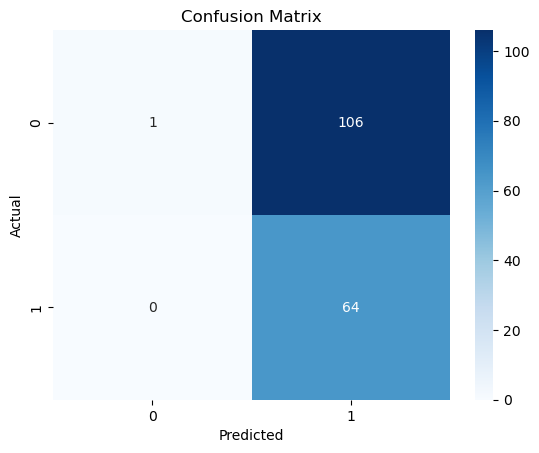

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       107
           1       0.38      1.00      0.55        64

    accuracy                           0.38       171
   macro avg       0.69      0.50      0.28       171
weighted avg       0.77      0.38      0.22       171

ROC-AUC: 0.925


In [198]:
# 6. Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Positive class probabilities

# 7. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 8. Classification report
print(classification_report(y_test, y_pred))

# 9. ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.3f}")

#### 5.Tune threshold and explain sigmoid function.


In [204]:
# Get probabilities for class 1
y_proba = model.predict_proba(X_test)[:, 1]  

# Calculate precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Find threshold that maximizes F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[f1_scores.argmax()]

y_pred_new = (y_proba >= best_threshold).astype(int)

In [228]:
# # print(y_pred_new)
# # print(best_threshold)
# print(thresholds)
# print("___"*10)

# print(precision)
# print("___"*10)
# print(recall)
# # print(y_proba)

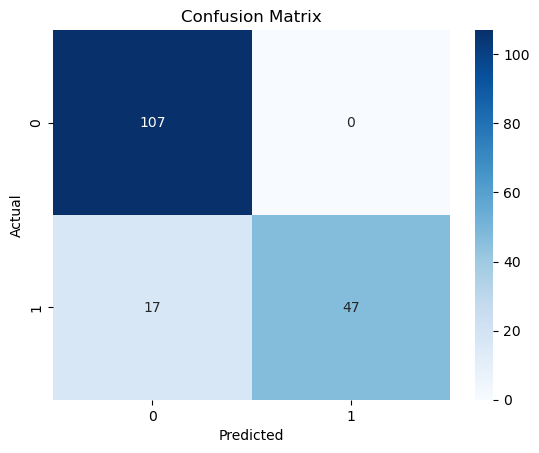

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       107
           1       1.00      0.73      0.85        64

    accuracy                           0.90       171
   macro avg       0.93      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171



In [208]:
from sklearn.metrics import confusion_matrix, classification_report

cmm=confusion_matrix(y_test, y_pred_new)
sns.heatmap(cmm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_new))


Sigmoid function:

In logistic regression, the sigmoid function is the mathematical step that turns the model’s linear output into a probability for binary
classification 
        
                                                    σ(z)= 1/(1+e^(−z))

You don’t need to manually apply the sigmoid function—predict_proba does this for you in scikit-learn’s logistic regression implementation